In [109]:
import pandas as pd
import numpy as np
import seaborn as sb
import statistics as sts
import matplotlib.pyplot as plt

In [110]:
#import data
data=pd.read_csv("Stores.csv")

In [111]:
#view for to know data
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [112]:
data.shape

(896, 5)

In [113]:
#rename of columns
data.columns=['ID_LOJA', 'AREA_M2', 'ITENS_DISPONIVEIS', 'CLIENTES_DIA','VENDAS_LOJA']
data.head()

,ID_LOJA,AREA_M2,ITENS_DISPONIVEIS,CLIENTES_DIA,VENDAS_LOJA
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [114]:
#data cleaning and processing
#are There duplicated ID? 
duplicado=data.duplicated()
duplicado=pd.DataFrame(duplicado)
duo=duplicado.groupby([0]).size()
duo[0]
if duo[0]!=896:
    print('Yes, ID duplicated')
else:
    print('Not duplicated ID')

sem ID repetido


In [115]:
#Are there null ID?
data.isnull().sum()

ID_LOJA              0
AREA_M2              0
ITENS_DISPONIVEIS    0
CLIENTES_DIA         0
VENDAS_LOJA          0
dtype: int64

In [116]:
#cheking domain.
#suppose the domain is greater than 100.
#to find error in domain and replace with the median
dom_area= data['AREA_M2']>100
if False in np.array(dom_area):
    dom_area=pd.DataFrame(dom_area)
    area_fora=dom_area.loc[(dom_clientes['AREA_M2']==False)]
    print('error domain area')
    print(area_fora, '\n')
    print('problem solving')
    a=area_fora.axes
    mediana_area=sts.median(data['AREA_M2'])
    for i in a[0]:
        data.loc[(i)]['AREA_M2']= mediana_area
        print(data.iloc[i])
else:
    print('not error')
    
dom_itens=data['ITENS_DISPONIVEIS']>100
if False in np.array(dom_itens):
    dom_itens=pd.DataFrame(dom_itens)
    itens_fora=dom_itens.loc[(dom_itens['ITENS_DISPONIVEIS']==False)]
    print('error domain itens')
    print(itens_fora, '\n')
    print('problem solving')
    a=itens_fora.axes
    mediana_itens=sts.median(data['ITENS_DISPONIVEIS'])
    for i in a[0]:
        data.loc[(i)]['ITENS_DISPONIVEIS']= mediana_itens
        print(data.iloc[i])
else:
    print('Not error itens')

dom_clientes=data['CLIENTES_DIA']>100
if False in np.array(dom_clientes):
    dom_clientes=pd.DataFrame(dom_clientes)
    cli_fora=dom_clientes.loc[(dom_clientes['CLIENTES_DIA']==False)]
    print('error domain fora')
    print(cli_fora, '\n')
    print('problema solving')
    a=cli_fora.axes
    mediana_cli=sts.median(data['CLIENTES_DIA'])
    for i in a[0]:
        data.loc[(i)]['CLIENTES_DIA']= mediana_cli
        print(data.iloc[i])
else:
    print('Not error clientes')

dom_vendas=data['VENDAS_LOJA']>100
if False in np.array(dom_vendas):
    dom_vendas=pd.DataFrame(dom_vendas)
    vendas_fora=dom_vendas.loc[(dom_vendas['VENDAS_LOJA']==False)]
    print('error domain vendas')
    print(vendas_fora, '\n')
    print('solving problem')
    a=vendas_fora.axes
    mediana_vendas=sts.median(data['VENDAS_LOJA'])
    for i in a[0]:
        data.loc[(i)]['VENDAS_LOJA']= mediana_vendas
        print(data.iloc[i])
else:
    print('Not error problem')

domínio area OK
domínio itens OK
domínio clientes fora
     CLIENTES_DIA
39          False
151         False
876         False 

resolvendo o problema
ID_LOJA                 40
AREA_M2               1270
ITENS_DISPONIVEIS     1516
CLIENTES_DIA           780
VENDAS_LOJA          45480
Name: 39, dtype: int64
ID_LOJA                152
AREA_M2               1662
ITENS_DISPONIVEIS     1986
CLIENTES_DIA           780
VENDAS_LOJA          63730
Name: 151, dtype: int64
ID_LOJA                877
AREA_M2               1259
ITENS_DISPONIVEIS     1493
CLIENTES_DIA           780
VENDAS_LOJA          88270
Name: 876, dtype: int64
domínio vendas OK


In [117]:
data.head(10)

,ID_LOJA,AREA_M2,ITENS_DISPONIVEIS,CLIENTES_DIA,VENDAS_LOJA
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


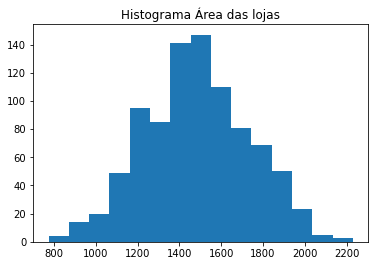

In [118]:
#Histogram Área - normal distribution
hist_area=plt.hist(data['AREA_M2'],
    bins=15,
    density=False)
tha=plt.title('Histograma Área das lojas')

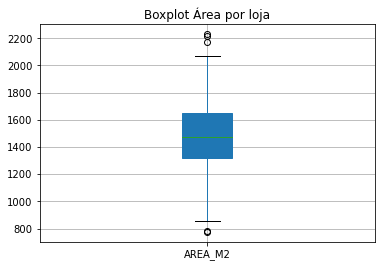

In [119]:
#plot views
box_area=data.boxplot(['AREA_M2'], patch_artist=True)
tba=plt.title('Boxplot Área por loja')
#Vemos que algumas há lojas muito maiores que outras
#hipotse h1: As mairoes lojas vendem mais?

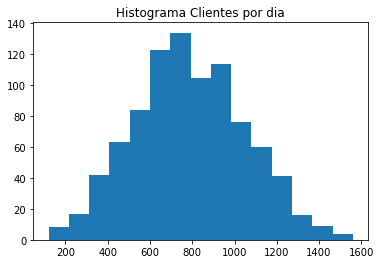

In [120]:
#Histogram clientes - normal distribution
hist_clientes=plt.hist(data['CLIENTES_DIA'],
    bins=15,
    density=False)
thc=plt.title('Histograma Clientes por dia')

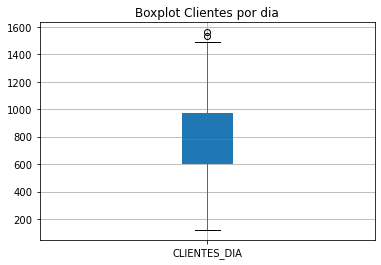

In [121]:
#boxplot
box_clientes=data.boxplot(['CLIENTES_DIA'],patch_artist=True)
tbc=plt.title('Boxplot Clientes por dia')
#Vemos que há lojas com mais clientes.
#hipotese h2:Estes out se relacionam com os out das maiores lojas?
#hipotese h3: essas lojas com mais clientes vendem mais? 

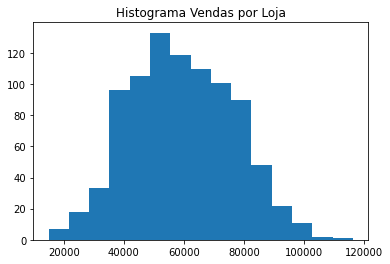

In [122]:
#histograma das vendas. distribuição normal
hist_clientes=plt.hist(data['VENDAS_LOJA'],
    bins=15,
    density=False)
thv=plt.title('Histograma Vendas por Loja')

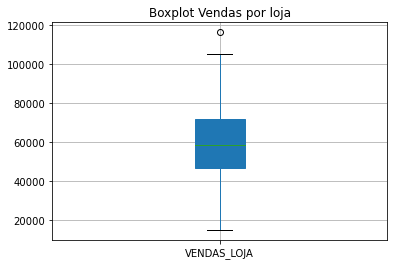

In [123]:
box_vendas=data.boxplot(['VENDAS_LOJA'],patch_artist=True)
tbv=plt.title('Boxplot Vendas por loja')

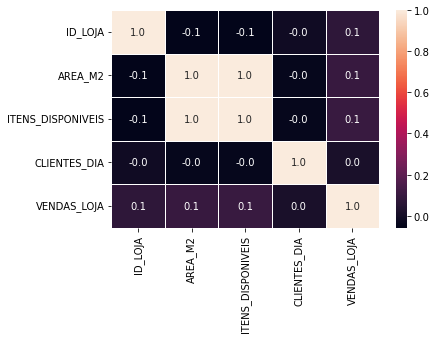

In [124]:
#cheking correlations
correlation=data.corr()
plot_heat=sb.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

Temos que: pρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;\n
ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

Portanto quase não temos correlações, apenas: area e itens

Isso pode nos indicar que a quantidade de vendas pode esta relacionada com outros aspectos, como: localização, preço, concorrencias, etc

In [125]:
#10 best-selling stores
data_vendas_cres=data.sort_values(by=['VENDAS_LOJA'],ascending=False)
data_vendas_cres.head(10)

,ID_LOJA,AREA_M2,ITENS_DISPONIVEIS,CLIENTES_DIA,VENDAS_LOJA
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820
557,558,1137,1374,700,101780
866,867,1565,1854,900,100900
166,167,1465,1763,680,99570
692,693,1548,1858,480,99480
871,872,1800,2158,1100,98260


In [126]:
#10 stores that sold the least
data_vendas_cres=data.sort_values(by=['VENDAS_LOJA'],ascending=True)
data_vendas_cres.head(10)

,ID_LOJA,AREA_M2,ITENS_DISPONIVEIS,CLIENTES_DIA,VENDAS_LOJA
31,32,1250,1508,990,14920
852,853,1477,1790,880,16370
775,776,1537,1877,660,17670
593,594,1624,1946,870,20270
352,353,1397,1686,850,21300
725,726,1445,1734,900,21470
372,373,1876,2254,1340,21650
277,278,1572,1869,1030,21750
252,253,1583,1907,680,21830
670,671,1461,1739,1250,22310


In [140]:
#mean ans median of sales
media_vendas=sts.mean(data['VENDAS_LOJA'])
mediana_vendas=sts.median(data['VENDAS_LOJA'])
print('A média é  {}  e a Mediana é {}'.format(media_vendas, mediana_vendas))

A média é  59351.30580357143  e a Mediana é 58605.0


In [143]:
#higher than average sales
venda_maior_media=data.loc[(data['VENDAS_LOJA'])>media_vendas]
print(venda_maior_media)

     ID_LOJA  AREA_M2  ITENS_DISPONIVEIS  CLIENTES_DIA  VENDAS_LOJA
0          1     1659               1961           530        66490
6          7     1542               1858          1030        72240
10        11     1187               1439          1090        71280
12        13     1746               2064          1050        60470
14        15     1469               1756           770        66360
..       ...      ...                ...           ...          ...
890      891     1549               1851          1220        70620
891      892     1582               1910          1080        66390
892      893     1387               1663           850        82080
893      894     1200               1436          1060        76440
894      895     1299               1560           770        96610

[433 rows x 5 columns]


In [145]:
#lower than average sales
venda_menor_media=data.loc[(data['VENDAS_LOJA'])<media_vendas]
print(venda_menor_media)

     ID_LOJA  AREA_M2  ITENS_DISPONIVEIS  CLIENTES_DIA  VENDAS_LOJA
1          2     1461               1752           210        39820
2          3     1340               1609           720        54010
3          4     1451               1748           620        53730
4          5     1770               2111           450        46620
5          6     1442               1733           760        45260
..       ...      ...                ...           ...          ...
883      884     1357               1625          1140        52160
884      885     1396               1673           690        32740
888      889     1451               1734           670        34880
889      890     1539               1829           650        46580
895      896     1174               1429          1110        54340

[463 rows x 5 columns]
